In [1]:
import numpy as np
from sklearn import *
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification 
from sklearn.metrics import mean_squared_error, r2_score
from numpy import asarray
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression, make_classification

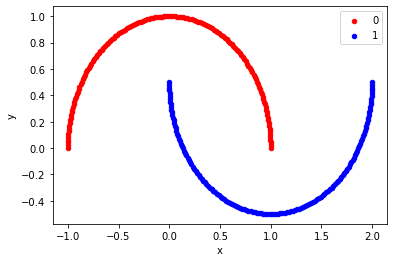

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [3]:
X,y

(array([[-5.99661212e-01,  8.00253979e-01],
        [ 1.01054206e+00, -4.99944431e-01],
        [ 2.19583374e-01,  9.75593738e-01],
        [ 3.50952862e-01, -2.60748192e-01],
        [ 1.98580788e+00,  3.32122599e-01],
        [-1.36620725e-01,  9.90623429e-01],
        [ 1.38024716e+00, -4.24884909e-01],
        [ 1.89433249e+00,  5.25970563e-02],
        [ 9.92008645e-01,  1.26169919e-01],
        [-9.99777730e-01,  2.10829523e-02],
        [ 1.05667508e-01,  5.25970563e-02],
        [ 1.36620725e-01,  9.90623429e-01],
        [ 9.43634357e-01,  3.30989730e-01],
        [ 4.93901126e-01,  8.69518072e-01],
        [ 1.41921190e-02,  3.32122599e-01],
        [-9.03566283e-01,  4.28448330e-01],
        [-5.65392191e-01,  8.24822205e-01],
        [ 1.73984391e+00, -1.72778558e-01],
        [ 0.00000000e+00,  5.00000000e-01],
        [ 1.63286406e+00, -2.74262931e-01],
        [ 1.08718834e-02,  3.52943654e-01],
        [-7.53863623e-01,  6.57030926e-01],
        [ 1.85346535e+00, -2.114

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.92

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[34  4]
 [ 2 35]]


In [12]:
from sklearn.metrics import classification_report
report= classification_report(y_test,y_pred)

In [13]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.90      0.95      0.92        37

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [14]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

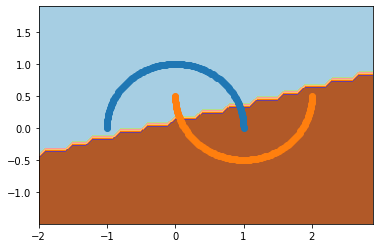

In [15]:



min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1

min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()

In [17]:
# i dont understand that


from sklearn.metrics.pairwise import pairwise_kernels

k = pairwise_kernels(X.reshape(-1, 1), Y=y.reshape(-1, 1), metric='linear')
print(k)

[[ 0.         -0.59966121  0.         ...  0.          0.
   0.        ]
 [ 0.          0.80025398  0.         ...  0.          0.
   0.        ]
 [ 0.          1.01054206  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.62466656  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.94363436  0.         ...  0.          0.
   0.        ]
 [ 0.          0.33098973  0.         ...  0.          0.
   0.        ]]


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [19]:
linear_svc = svm.SVC(kernel='linear')

In [20]:
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [22]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [23]:
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', SVC(random_state=42))])

In [24]:
param_range = [1, 2, 3, 4, 5, 6]
n_estimators = [50,100,150]
learning_rates = [.1,]

In [25]:
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]

In [26]:
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy')

In [27]:
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy')

In [28]:
knn_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid=[{'KNN__metric': ['euclidean', 'manhattan'],
                          'KNN__n_neighbors': [1, 2, 3, 4, 5, 6],
                          'KNN__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [29]:
svm_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('SVM', SVC(random_state=42))]),
             param_grid=[{'SVM__C': [1, 2, 3, 4, 5, 6],
                          'SVM__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [30]:
knn_grid_search.score(X_test,y_test)

0.88

In [31]:
svm_grid_search.score(X_test,y_test)

0.96

In [33]:
knn_grid_search.best_params_

{'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}

In [34]:
svm_grid_search.best_params_

{'SVM__C': 1, 'SVM__kernel': 'rbf'}